# Astrophysics Laboratory: Data analysis - Stellar clusters
## M71 Data:

Necessary imports:

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Matplotlib style ;)
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

# Reset matplotlib style
# plt.rcParams.update(plt.rcParamsDefault)

### Master bias creation

Verification: biasFiles = ['bias_good_2023-09-19_18-53-10_0000.fits', 'bias_good_2023-09-19_18-53-12_0001.fits', 'bias_good_2023-09-19_18-53-15_0002.fits', 'bias_good_2023-09-19_18-53-17_0003.fits', 'bias_good_2023-09-19_18-53-20_0004.fits', 'bias_good_2023-09-19_18-53-22_0005.fits', 'bias_good_2023-09-19_18-53-25_0006.fits', 'bias_good_2023-09-19_18-53-27_0007.fits', 'bias_good_2023-09-19_18-53-30_0008.fits', 'bias_good_2023-09-19_18-53-32_0009.fits', 'bias_good_2023-09-19_18-53-35_0010.fits', 'bias_good_2023-09-19_18-53-37_0011.fits', 'bias_good_2023-09-19_18-53-40_0012.fits', 'bias_good_2023-09-19_18-53-42_0013.fits', 'bias_good_2023-09-19_18-53-45_0014.fits', 'bias_good_2023-09-19_18-53-47_0015.fits', 'bias_good_2023-09-19_18-53-50_0016.fits', 'bias_good_2023-09-19_18-53-52_0017.fits', 'bias_good_2023-09-19_18-53-55_0018.fits', 'bias_good_2023-09-19_18-53-57_0019.fits', 'bias_good_2023-09-19_18-53-59_0020.fits', 'bias_good_2023-09-19_18-54-02_0021.fits', 'bias_good_2023-09-19_18-54

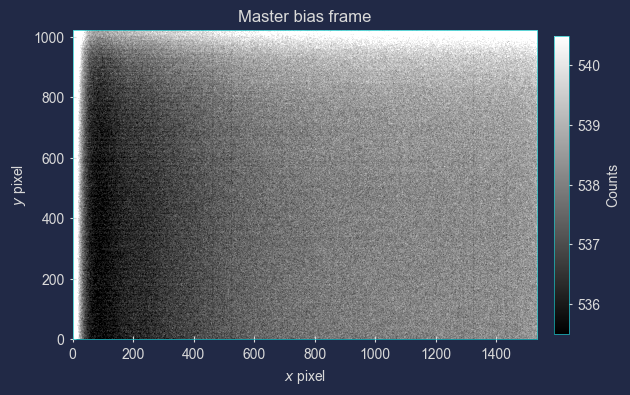

In [6]:
# Storage directory
dir = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibration_Images/"

# Reading bias files
biasFiles, fitsAll, biasAll = [], [], []
for file_n in os.listdir(dir):
     if "bias" in file_n: biasFiles.append(file_n)
print(f"Verification: biasFiles = {biasFiles}")
for file_n in biasFiles:
    fitsAll.append(fits.open(dir + file_n))
    biasAll.append(fitsAll[-1][0].data)

# I think this is better. I don't think we should normalize here.
biasAllNormalized = np.asarray([biasAll[i] for i in range(len(biasAll))])

# Stacking bias files. Criteria: median.
masterBias = np.median(biasAllNormalized, axis = 0)
print(f'Shape tests: {np.shape(biasAllNormalized)}, {np.shape(masterBias)}')
print(f'Normalized median (test) = {np.median(masterBias)}')

# Plot the resulting master bias frame.
lo, up = np.percentile(masterBias, 5), np.percentile(masterBias, 95)
plt.figure()
plt.title('Master bias frame')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(masterBias, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

# Save image, as a FITS file.
fits.writeto('Calibration_Frames/MasterBias.fits', masterBias, fitsAll[0][0].header, overwrite = True) # Using fitsAll[0]'s header as header.

### Master flat (Red, Green, Blue) creation

Creating master flat (Red) frame...
Verification (5 files read): flatRedFiles = ['flat_2023-09-19_19-07-39_Red_0066.fits', 'flat_2023-09-19_19-07-45_Red_0067.fits', 'flat_2023-09-19_19-07-52_Red_0068.fits', 'flat_2023-09-19_19-07-59_Red_0069.fits', 'flat_2023-09-19_19-08-05_Red_0070.fits']
Shape tests: Before stacking = (5, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 0.999903243285084


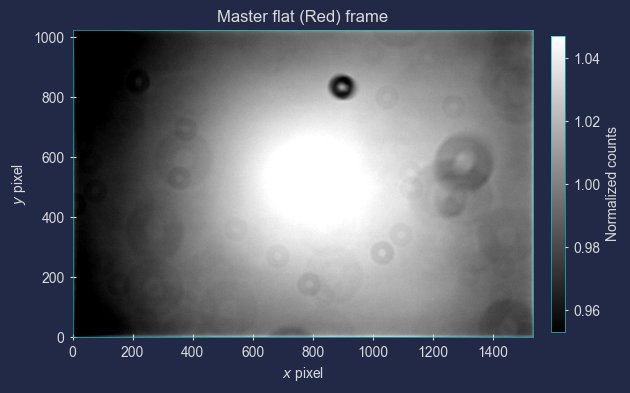

Master flat (Red) frame saved as FITS file.

Creating master flat (Green) frame...
Verification (5 files read): flatGreenFiles = ['flat_2023-09-19_19-06-06_Green_0060.fits', 'flat_2023-09-19_19-06-14_Green_0061.fits', 'flat_2023-09-19_19-06-23_Green_0062.fits', 'flat_2023-09-19_19-06-31_Green_0063.fits', 'flat_2023-09-19_19-06-40_Green_0064.fits']
Shape tests: Before stacking = (5, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 0.9999690249039772


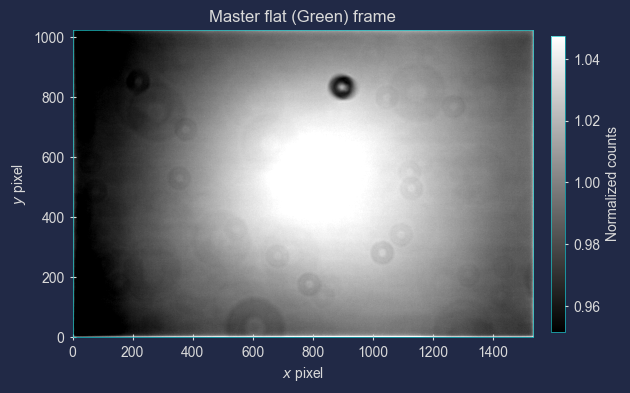

Master flat (Green) frame saved as FITS file.

Creating master flat (Blue) frame...
Verification (5 files read): flatBlueFiles = ['flat_2023-09-19_19-01-14_Blue_0053.fits', 'flat_2023-09-19_19-01-32_Blue_0054.fits', 'flat_2023-09-19_19-01-49_Blue_0055.fits', 'flat_2023-09-19_19-02-07_Blue_0056.fits', 'flat_2023-09-19_19-02-24_Blue_0057.fits']
Shape tests: Before stacking = (5, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 0.9999053903829325


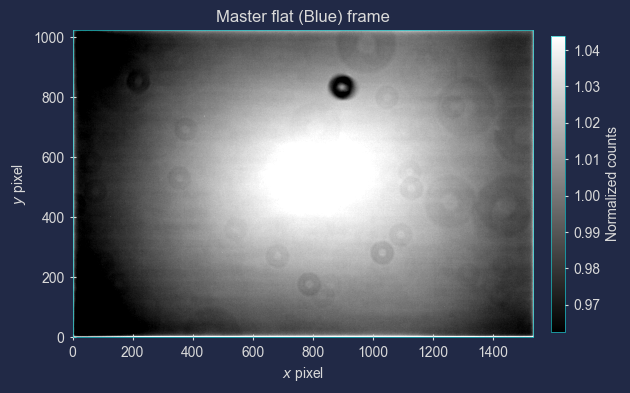

Master flat (Blue) frame saved as FITS file.


In [7]:
def masterFlatCreator(filter: str, plot_flag: bool) -> None:
    """
    Description:
        Creates a master flat frame for a given filter.
    Args:
        filter (str): filter of the flat frames to be used. Input should be 'Red', 'Green' or 'Blue'.
        plot_flag (bool): if True, plots the resulting master flat frame.
    Outputs:
        None.
    """

    # Status message.
    print(f'Creating master flat ({filter}) frame...')

    # Reading flat files, for filter X.
    flatX_Files, fits_All, flatX_All = [], [], []
    for file_n in os.listdir(dir):
         if ("flat" and f"{filter}" in file_n): flatX_Files.append(file_n)
    print(f"Verification ({len(flatX_Files)} files read): flat{filter}Files = {flatX_Files}")
    for file_n in flatX_Files:
        fits_All.append(fits.open(dir + file_n))
        flatX_All.append(fits_All[-1][0].data)
    
    # Subtracting master bias from flatX files AND normalizing afterwards. Criteria: median. I hope this is right.
    flatX_All_Normalized = np.asarray([(flatX_All[i] - masterBias)/np.median(flatX_All[i] - masterBias) for i in range(len(flatX_All))])
    
    # Stacking flatX files. Criteria: median.
    masterFlatX = np.median(flatX_All_Normalized, axis = 0)
    
    print(f'Shape tests: Before stacking = {np.shape(flatX_All_Normalized)}; After stacking = {np.shape(masterFlatX)}')
    print(f'Normalized median (test) = {np.median(masterFlatX)}')
    
    if(plot_flag == True):
        # Plot the resulting master flatX frame.
        lo, up = np.percentile(masterFlatX, 5), np.percentile(masterFlatX, 95)
        plt.figure()
        plt.title(f'Master flat ({filter}) frame')
        plt.xlabel(r'$x$ pixel')
        plt.ylabel(r'$y$ pixel')
        plt.imshow(masterFlatX, cmap = 'gray', clim = (lo, up), origin = 'lower')
        plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Normalized counts')
        plt.tight_layout()
        plt.grid(False)
        plt.show()
    
    # Save image as a FITS file.
    fits.writeto(f'Calibration_Frames/MasterFlat{filter}.fits', masterFlatX, fits_All[0][0].header, overwrite = True) # Using fitsAll[0]'s header as header.
    print(f'Master flat ({filter}) frame saved as FITS file.')

# Creating master flat frames for each filter.
masterFlatCreator('Red', True); print()
masterFlatCreator('Green', True); print()
masterFlatCreator('Blue', True)
    

### Image calibration
Data:
- For Red filter:   173 - 182: Science (60 sec. exposures);
- For Green filter: 150 - 159: Science (60 sec. exposures);
- For Blue filter:  162 - 171: Science (90 sec. exposures).

In [86]:
def generateCalibratedFrames(filter: str) -> None:
    """
    Description:
        Generates calibrated images for a given filter, aka, subtracts master bias and divides by master flat.
    Args:
        filter (str): filter of the light frames to be used. Input should be 'Red', 'Green' or 'Blue'.
    Outputs:
        calibrated images (FITS files).
    """
    # Reading created master flat files. 
    if(filter == "Green"):  masterFlat = fits.open('Calibration_Frames/MasterFlatGreen.fits')[0].data; print("Generating Green..."); d = 4
    elif(filter == "Blue"): masterFlat = fits.open('Calibration_Frames/MasterFlatBlue.fits')[0].data; print("Generating Blue...");   d = 2
    elif(filter == "Red"):  masterFlat = fits.open('Calibration_Frames/MasterFlatRed.fits')[0].data; print("Generating Red...");     d = 2
    # Red has d = 2, because of a naming mistake previously, I guess...

    # Storage directory
    dir_Images = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/All_Images/"

    # Reading light f'{filter}' files
    light_X_Files, light_X_All, header_g_All = [], [], []
    for file_n in os.listdir(dir_Images):
         if ("M71" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
    light_X_Files = light_X_Files[d:]
    print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
    for file_n in light_X_Files:
        light_X_All.append(fits.open(dir_Images + file_n)[0].data)
        header_g_All.append(fits.open(dir_Images + file_n)[0].header)

    # Correction with bias and flat.
    light_X_All_corrected = (light_X_All - masterBias)/masterFlat
    
    for n, frame in enumerate(light_X_All_corrected):
        fits.writeto(f'C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibrated_Images/{light_X_Files[n]}', frame, header_g_All[n], overwrite = True)

# Generating calibrated images.
generateCalibratedFrames("Red")
generateCalibratedFrames("Green")
generateCalibratedFrames("Blue")

Generating Red...
Verification (10 files read): lightRedFiles = ['M71_2023-09-19_21-13-32_Red_0173.fits', 'M71_2023-09-19_21-14-35_Red_0174.fits', 'M71_2023-09-19_21-15-37_Red_0175.fits', 'M71_2023-09-19_21-16-40_Red_0176.fits', 'M71_2023-09-19_21-17-43_Red_0177.fits', 'M71_2023-09-19_21-18-45_Red_0178.fits', 'M71_2023-09-19_21-19-48_Red_0179.fits', 'M71_2023-09-19_21-20-51_Red_0180.fits', 'M71_2023-09-19_21-21-53_Red_0181.fits', 'M71_2023-09-19_21-22-56_Red_0182.fits']
Generating Green...
Verification (10 files read): lightGreenFiles = ['M71_2023-09-19_20-37-34_Green_0150.fits', 'M71_2023-09-19_20-38-37_Green_0151.fits', 'M71_2023-09-19_20-39-40_Green_0152.fits', 'M71_2023-09-19_20-40-42_Green_0153.fits', 'M71_2023-09-19_20-41-45_Green_0154.fits', 'M71_2023-09-19_20-42-48_Green_0155.fits', 'M71_2023-09-19_20-43-50_Green_0156.fits', 'M71_2023-09-19_20-44-53_Green_0157.fits', 'M71_2023-09-19_20-45-55_Green_0158.fits', 'M71_2023-09-19_20-46-58_Green_0159.fits']
Generating Blue...
Verific

## Appendix: Random tests
### Attempt to correct an image
Vignetting and big dust donut are gone!

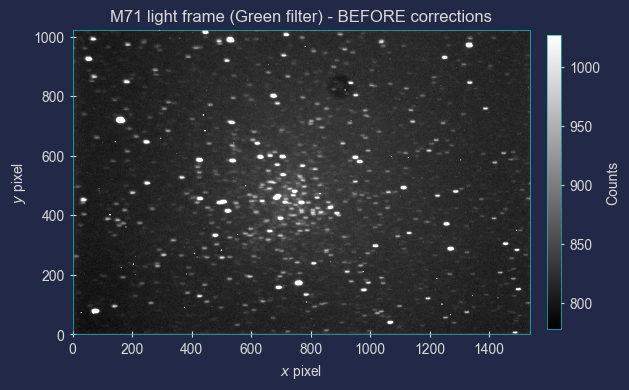

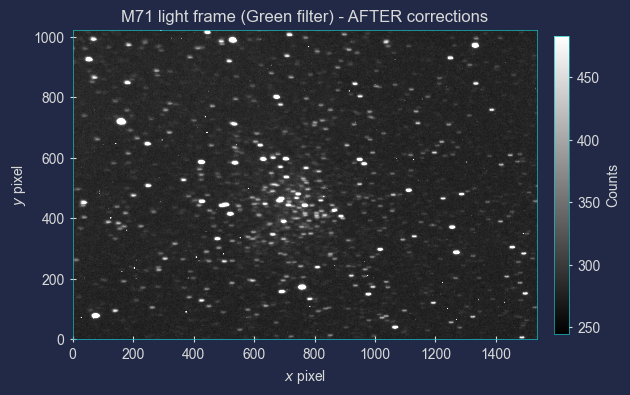

In [102]:
# Reading created green master flat file. For Green filter: 150 - 159: Science.
masterFlatGreen = fits.open('Calibration_Frames/MasterFlatGreen.fits')[0].data

# Reading a random light frame to test the code.
light_g_path = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/All_Images/M71_2023-09-19_20-37-34_Green_0150.fits"
fits_g = fits.open(light_g_path)
header_g = fits_g[0].header
light_g = fits_g[0].data

# Test plot: before corrections with master bias and master flat.
lo, up = np.percentile(light_g, 0.5), np.percentile(light_g, 99.5)
plt.figure()
plt.title(f'M71 light frame (Green filter) - BEFORE corrections')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(light_g, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

# Actual correction with bias and flat.
light_g_corrected = (light_g - masterBias)/masterFlatGreen

# Test plot: AFTER corrections with master bias and master flat.
lo, up = np.percentile(light_g_corrected, 0.5), np.percentile(light_g_corrected, 99.5)
plt.figure()
plt.title(f'M71 light frame (Green filter) - AFTER corrections')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(light_g_corrected, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

### RGB colour composite image attempt:
This fails because the images are:
- 1: Not calibrated; (Now they are!)
- 2: Not aligned. (I think it's good now)

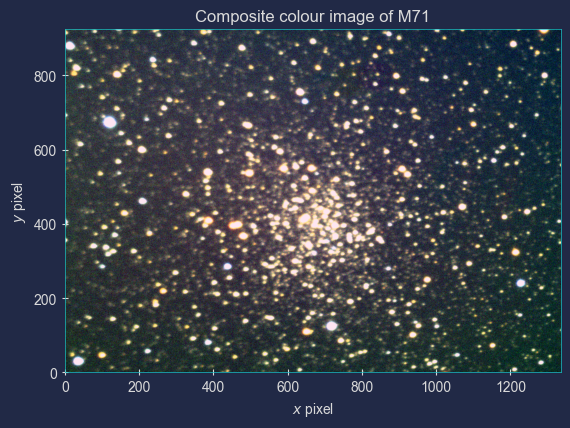

In [9]:
from astropy.visualization import make_lupton_rgb, PowerStretch, ZScaleInterval

forCasting = np.float_()

# Read the three images. Need to interpret as 'float', otherwise 'make_lupton_rgb' complains.
r = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Red_Stacked_aligned.fits'  )[0].data
g = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Green_Stacked_aligned.fits')[0].data
b = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Blue_Stacked_aligned.fits' )[0].data

# Crop the top and the right margin (contains black pixels, from the alignment process)
r = r[50:-50, 100:-100]
g = g[50:-50, 100:-100]
b = b[50:-50, 100:-100]

# Casting to float
r = np.array(r, forCasting)
g = np.array(g, forCasting)
b = np.array(b, forCasting)

stretch = PowerStretch(a = 1) + ZScaleInterval() # PowerStretch (a = 1) is a linear stretch.

r = stretch(r)
g = stretch(g)/1.10 # Random factors to make the image look prettier ;)
b = stretch(b)/1.05

# Plot RGB individually/separately, if you want to.
# plt.imshow(r, cmap = "Reds", origin = 'lower')
# plt.imshow(g, cmap = "Greens", origin = 'lower')
# plt.imshow(b, cmap = "Blues", origin = 'lower')

lo_val, up_val = np.percentile(np.hstack((r.flatten(), g.flatten(), b.flatten())), (0.5, 99.5))  # Get the value of lower and upper 0.5% of all pixels
stretch_val = up_val - lo_val
rgb_default = make_lupton_rgb(r, g, b, minimum = lo_val, Q = 0, stretch = stretch_val, filename = "M71-Default.jpeg")

# Cut the top rows - contains black pixels
# rgb_default = rgb_default[50:-50, 100:-100, :]

plt.imshow(rgb_default, origin = 'lower')
plt.title('Composite colour image of M71')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.savefig('M71_CompositeRGB.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Attempt at stacking light frames:
We try using **median** (integrated exposure: 10 mins. Except for blue: 15 mins.)

Verification (10 files read): lightBlueFiles = ['M71_2023-09-19_20-54-26_Blue_0162_AlignedColour.fits', 'M71_2023-09-19_20-55-58_Blue_0163_AlignedColour.fits', 'M71_2023-09-19_20-57-31_Blue_0164_AlignedColour.fits', 'M71_2023-09-19_20-59-04_Blue_0165_AlignedColour.fits', 'M71_2023-09-19_21-00-36_Blue_0166_AlignedColour.fits', 'M71_2023-09-19_21-02-09_Blue_0167_AlignedColour.fits', 'M71_2023-09-19_21-03-42_Blue_0168_AlignedColour.fits', 'M71_2023-09-19_21-05-14_Blue_0169_AlignedColour.fits', 'M71_2023-09-19_21-06-47_Blue_0170_AlignedColour.fits', 'M71_2023-09-19_21-08-20_Blue_0171_AlignedColour.fits']


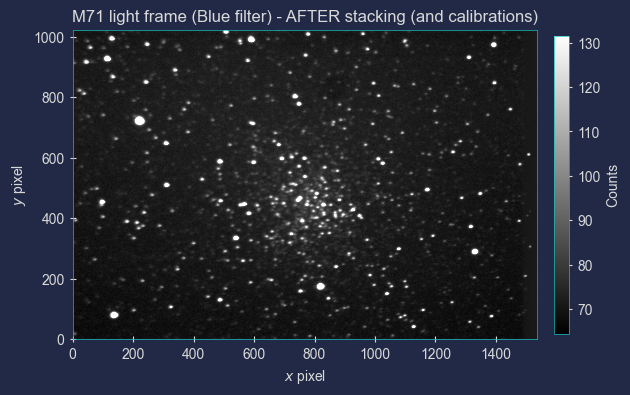

In [8]:
# Storage directory
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
filter = "Blue" # Red, Green or Blue. Change this to change the filter.

# Reading light f'{filter}' files
light_X_Files, light_X_All, header_g_All = [], [], []
for file_n in os.listdir(dir_Light):
     if ("M71" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
for file_n in light_X_Files:
    light_X_All.append(fits.open(dir_Light + file_n)[0].data)
    header_g_All.append(fits.open(dir_Light + file_n)[0].header)

lightBlue_Stack = np.median(light_X_All, axis = 0) # Sum or median here? Median looks better.
                                                   # Should sum be better? Because we want to have more counts?
fits.writeto('./Alignment/' + filter + '_Stacked' + '.fits', lightBlue_Stack, header_g_All[0], overwrite = True)

# Test plot: AFTER stacking.
lo, up = np.percentile(lightBlue_Stack, 1.5), np.percentile(lightBlue_Stack, 99.5)
plt.figure()
plt.title(f'M71 light frame ({filter} filter) - AFTER stacking (and calibrations)')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(lightBlue_Stack, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

Unalignment is very clear here. Not anymore, since we've fixed it. I hope.

### Alignment attempt, using `astroalign`:

In [5]:
import astroalign as aa

dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibrated_Images/"
files = []; filter = 'Green'
for file_n in os.listdir(dir_Light):
     if ("M71" in file_n and f"{filter}" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('./Alignment/' + aligned_file + '_AlignedColour' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['M71_2023-09-19_20-37-34_Green_0150.fits', 'M71_2023-09-19_20-38-37_Green_0151.fits', 'M71_2023-09-19_20-39-40_Green_0152.fits', 'M71_2023-09-19_20-40-42_Green_0153.fits', 'M71_2023-09-19_20-41-45_Green_0154.fits', 'M71_2023-09-19_20-42-48_Green_0155.fits', 'M71_2023-09-19_20-43-50_Green_0156.fits', 'M71_2023-09-19_20-44-53_Green_0157.fits', 'M71_2023-09-19_20-45-55_Green_0158.fits', 'M71_2023-09-19_20-46-58_Green_0159.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.
No. 3 alignment done.
No. 4 alignment done.
No. 5 alignment done.
No. 6 alignment done.
No. 7 alignment done.
No. 8 alignment done.
No. 9 alignment done.


Now, aligning the three master light frames (R, G, B):

In [10]:
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
files = []
for file_n in os.listdir(dir_Light):
     if ("Stacked" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('./Alignment/' + aligned_file + '_aligned' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['Blue_Stacked.fits', 'Green_Stacked.fits', 'Red_Stacked.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.


### Star finder procedure

Found 1464 stars in image.


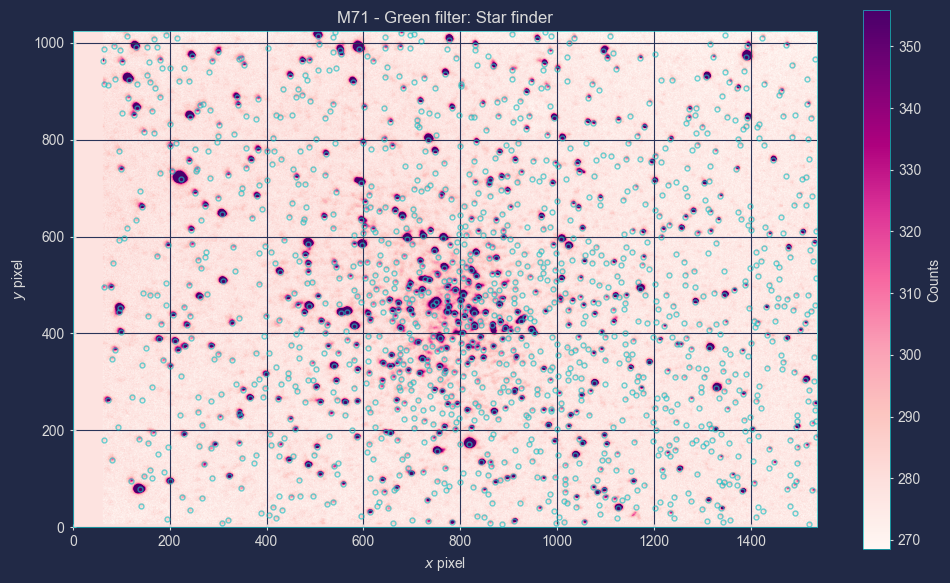

In [200]:
# Find stars in the field
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats, gaussian_sigma_to_fwhm

dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
Green_frame = "Green_Stacked_aligned.fits"
data_g = fits.open(dir_Light + Green_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources = daofind(data_g - median)
print("Found %i stars in image." %len(sources))

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("M71 - Green filter: Star finder")
l1 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 1.5)
l2 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 98.5)
plt.imshow(data_g, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(sources["xcentroid"], sources["ycentroid"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.65)
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.show()

In [208]:
# Take 'nbright' brightest stars and print list of their fluxes
nbright = 50
brightest = np.argsort(sources['flux'])[::-1][0:nbright]
brsources = sources[brightest]
brsources.pprint(max_width = 250) # Print 'nbright' brigthest sources

 id      xcentroid          ycentroid           sharpness            roundness1            roundness2      npix sky        peak               flux                mag        
---- ------------------ ------------------ ------------------- ---------------------- -------------------- ---- --- ------------------ ------------------ -------------------
1144 222.52953448180614  718.6283298917049  0.5385726498856181   -0.07771448892451124 -0.20454014170634613  169 0.0 10283.474914874443  953.4556533110249  -7.448251245368535
 220  818.5421569268673 172.74170390543298  0.5341748512750006    0.04200021725869714 -0.20533665859100125  169 0.0  7439.287593234402  764.2122147881987 -7.2080349373875094
1413  1390.080822634507  970.7602970933627  0.5090172216604395   -0.19011300855337168 0.022176395555263247  169 0.0  5004.817285810479  539.0512875674215  -6.829075219311337
1428  590.2020078628386  987.5362113723254  0.5698327762853169   -0.25595520711282654 -0.17480896977322058  169 0.0   4607.6312670

Note that `DAOStarFinder` uses a diferent formula for the instrumental magnitude than what we are supposed to use. They use:
$m_{inst} = -2.5 \log{\left(flux\right)}$, whereas we should use: $m_{inst} = -2.5 \log{\left(\frac{flux}{t_{exp}}\right)}$ ($log_{10}$, btw).

In [196]:
m_inst_SAO = -2.5 * np.log10(953.4556533110249)
m_inst_Man = -2.5 * np.log10(953.4556533110249/90)
print(f"Differences: m_inst_SAO = {m_inst_SAO}, m_inst_Man = {m_inst_Man}.")

Differences: m_inst_SAO = -7.448251245368535, m_inst_Man = -2.562644971770224.


*Question*: what should we use to compute the absolute magnitude? V filter? Or, no filter at all?

In [197]:
# Magnitudes column. Shouldn't use these, btw.
brsources['mag']

-7.448251245368535
-7.2080349373875094
-6.829075219311337
-6.569877761200371
-6.407685459115784
-6.23098636004472
-5.818848592180328
-5.6127865213313335
-5.6014302941273675
-5.588174839136137
-5.477929253718811


Automatization: All three filters

In [210]:
# Find stars in the field
dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
Red_frame = "Red_Stacked_aligned.fits"
Green_frame = "Green_Stacked_aligned.fits"
Blue_frame = "Blue_Stacked_aligned.fits"

data_r = fits.open(dir_Light + Red_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
data_g = fits.open(dir_Light + Green_frame)[0].data + 0
data_b = fits.open(dir_Light + Blue_frame)[0].data + 0

# Get background
mean, median, std = sigma_clipped_stats(data_r, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_r = daofind(data_r - median)
print("Found %i stars in image (Red)." %len(sources_r))

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_g = daofind(data_g - median)
print("Found %i stars in image (Green)." %len(sources_g))

# Get background
mean, median, std = sigma_clipped_stats(data_b, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_b = daofind(data_b - median)
print("Found %i stars in image (Blue)." %len(sources_b))

Found 1603 stars in image (Red).
Found 1464 stars in image (Green).
Found 804 stars in image (Blue).


In [219]:
# Take 'nbright' brightest stars and print list of their fluxes
nbright = 5

brightest_r = np.argsort(sources_r['flux'])[::-1][0:nbright]
brightest_g = np.argsort(sources_g['flux'])[::-1][0:nbright]
brightest_b = np.argsort(sources_b['flux'])[::-1][0:nbright]

brsources_r = sources_r[brightest_r]
brsources_g = sources_g[brightest_g]
brsources_b = sources_b[brightest_b]

print("- R filter:"); brsources_r.pprint(max_width = 250); print() # Print 'nbright' brigthest sources
print("- V filter:"); brsources_g.pprint(max_width = 250); print()
print("- B filter:"); brsources_b.pprint(max_width = 250)

- R filter:
 id      xcentroid          ycentroid          sharpness           roundness1            roundness2      npix sky        peak               flux               mag        
---- ------------------ ------------------ ------------------ -------------------- --------------------- ---- --- ------------------ ------------------ ------------------
1563 1390.3090439687198  970.7282795962223 0.6051443025931456 -0.13305777385812675 -0.025556384949287428  169 0.0 20243.006459284188 1027.7749713808444     -7.52974509359
1270 222.37118577338592  718.6360980236697 0.5221989393955269 -0.14365719197018084  -0.10959676942419302  169 0.0   15683.3049495865  807.9579690467141 -7.268471922091583
 244  818.6523973033603 172.62816540196545 0.6360530984585422  0.03478857685375376  -0.15087286982847217  169 0.0 15187.523707113187  747.4697234851833 -7.183984015268381
1581  590.1040408492122  987.7188355062333 0.5097094653907698 -0.26055379286159397  -0.06008808879073541  169 0.0 11159.951042869307 

In [223]:
magR = -2.5 * np.log10(brsources_r['flux']/60) # Remember to divide by exposure time!
magG = -2.5 * np.log10(brsources_g['flux']/60) 
magB = -2.5 * np.log10(brsources_b['flux']/90)
# Now, I'm missing the calibration with the standard photometric star.